# Lecture 2: LSI Systems and Convolution in 1D

# Warm-up question (not graded)

Why do we care about linearity, shift-invariance, and convolution? 

In [93]:
## MP 573 Lecture 2: LSI Systems and Convolution in 1D
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

# Create some example systems and test linearity and shift invariance
In this lecture, we will cover the properties of linearity and shift invariance. Since these properties (particularly shift-invariance) may not be intuitive at first, we will examine them for several example systems using some example inputs and constants. In the next cells, we define an input signal, a function that implements each of the systems in section 2.4 of the notes, and we will plot the output of such systems for this input. 


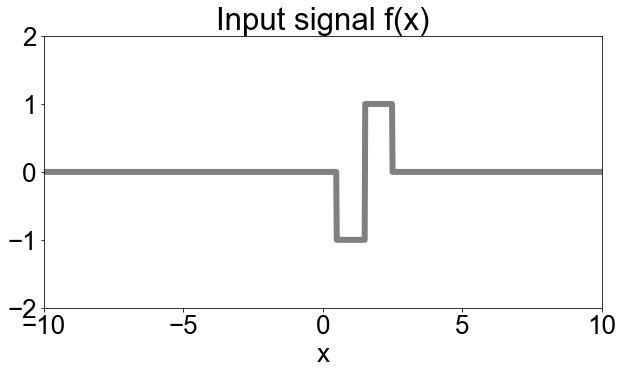

In [94]:
# Simulate 1D input signal f(x)
N = 1001
xmax = 10
x = np.linspace(-xmax,xmax,N)
f = 1.0*(np.abs(x-2)<0.5) - 1.0*(np.abs(x-1)<=0.5)

plt.figure(figsize=(10,5))
font = {'weight' : 'normal',
        'size'   : 26}

# Plot the input signal f(x)
plt.rc('font', **font)
plt.plot(x,f,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('Input signal f(x)');


In [95]:
# Here is a function describing each of the systems in Section 2.4 of the notes
def ExampleSystem(f,x,pickSystem):
    # ExampleSystem: simulates each of the systems described in the question within Section 2.4 of the notes
    
    # Arguments:
    #     f: the input signal
    #     x: the horizontal axis (x coordinates) for the input signal
    #     pickSystem: the choice of example system (A-G)
    
    # Returns:
    #    g: the output signal
    
    if pickSystem == 'A': 
        g = f    # Example A from the lecture notes section 2.4
    elif pickSystem == 'B': 
        g = np.maximum(f,0) # Example B
    elif pickSystem == 'C': 
        g = np.abs(f) # Example C
    elif pickSystem == 'D': 
        g = f + 1 # Example D
    elif pickSystem == 'E': 
        g = f[x==0] + 0*f # Example E
    elif pickSystem == 'F': 
        h =  1.0*(np.abs(x)<=0.5) # Example F
        g = (x[1]-x[0])*signal.convolve(h, f, mode='same') # Example F (cont)
    elif pickSystem == 'G': 
        g = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))/np.sqrt(len(f))
        # We will revisit example G (Fourier transform) in future lectures and exercises
    else: 
        g = 0*f    # Some default behavior
    return (g)

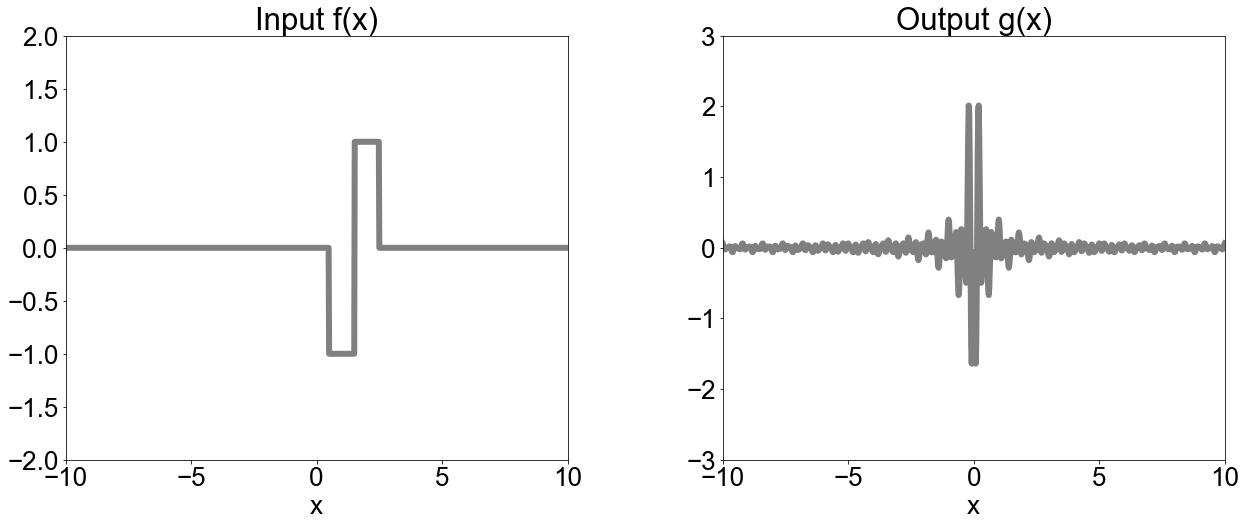

In [96]:
# Now let's run our signal through our system 
g = ExampleSystem(f,x,'G')

# Plot the input and output signals
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,f,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('Input f(x)')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(g),'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-3,3])
plt.title('Output g(x)')
plt.xlabel('x')
plt.tight_layout(pad=4.0)



# Set up an example to check linearity and shift invariance

In the next cell, we create two signals f1 and f2. Additionally, we set some values for scaling constants a1=1, a2=2 (which we will use in our linearity check), and shift of x0=4 (which we will use in our shift invariance check). Finally, we plot f1 and f2. 

These signals and constants will be used in the subsequent cells. 

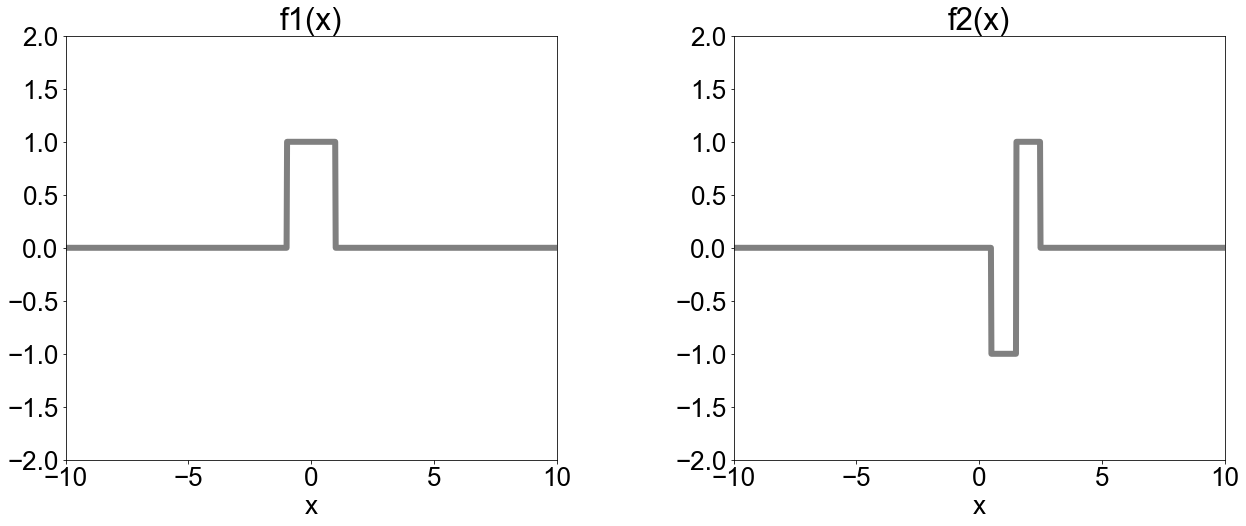

In [97]:
# Let's now simulate two signals f1 and f2, and let's assume scaling constants a1=1, a2=2, and shift of x0=4
f1 = 1.0*(np.abs(x)<1)
f2 = 1.0*(np.abs(x-2)<0.5) - 1.0*(np.abs(x-1)<=0.5)
a1 = 0.5
a2 = 1
x0=4

# Plot f1 and f2
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,f1,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('f1(x)')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,f2,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('f2(x)')
plt.xlabel('x')
plt.tight_layout(pad=4.0)


# Q1: check linearity using our example signals and constants, for the systems in section 2.4 

Instructions: Run the following cell using each value of 'pickSystem' between 'A' and 'G', and look at the plots for the following two signals:
* $g_3(x)$ (the output to $f_3(x) = a_1 f_1(x) + a_2 f_2(x)$), 
* $a_1 g_1(x) + a_2 g_2(x)$ (where $g_1(x)$ and $g_2(x)$ are the outputs for inputs $f_1(x)$ and $f_2(x)$, respectively). 
Also, check the norm of the difference between these two signals (to check for equality). 

Do each of the systems in section 2.4 satisfy the property $g_3(x) = a_1 g_1(x) + a_2 g_2(x)$ for our specific examples of $f_1(x)$, $f_2(x)$, $a_1$, $a_2$?



Norm of the difference: ||g3 - (a1*g1+a2*g2)|| =  0.000000


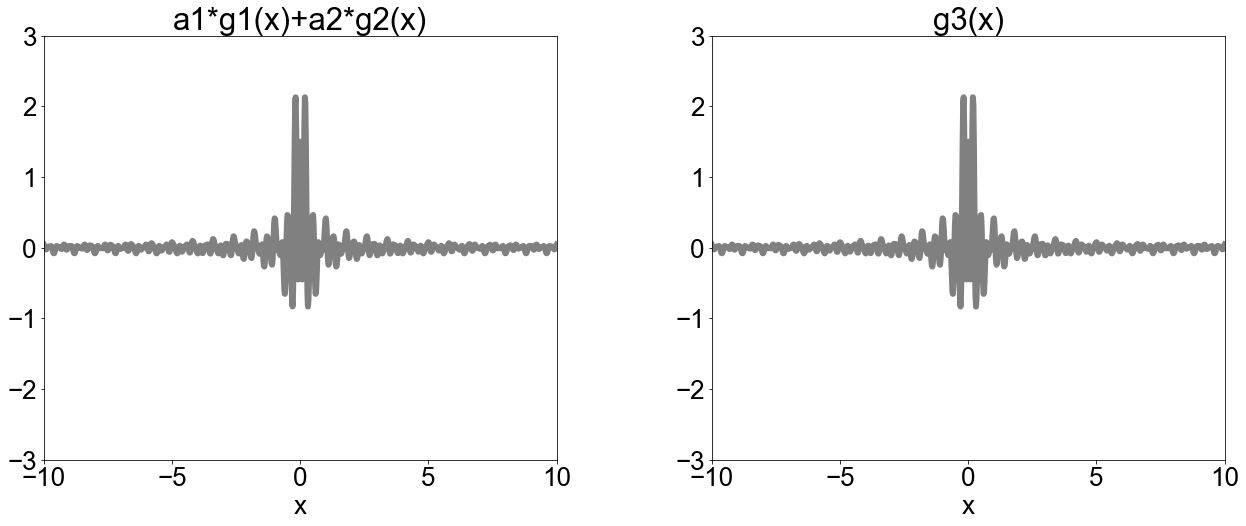

In [98]:
# Pick an example system and check for linearity
pickSystem = 'G'
g1 = ExampleSystem(f1,x,pickSystem)
g2 = ExampleSystem(f2,x,pickSystem)

g3 = ExampleSystem(a1*f1+a2*f2,x,pickSystem)


# Check whether the two versions are the same
difference = np.linalg.norm(g3 - (a1*g1+a2*g2))
print("Norm of the difference: ||g3 - (a1*g1+a2*g2)|| = ", '{:f}'.format(difference))


# Plot a1*g1+a2*g2 and g3
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(a1*g1+a2*g2),'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-3,3])
plt.xlabel('x')
plt.title('a1*g1(x)+a2*g2(x)')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(g3),'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-3,3])
plt.title('g3(x)')
plt.xlabel('x')
plt.tight_layout(pad=4.0)



# Q2: check shift invariance using our example signals and shift, for the systems in section 2.4 

Instructions: Run the following cell using each value of 'pickSystem' between 'A' and 'G', and look at the plots for the following two signals:
* $g_2(x)$ (the output to $f_2(x) = f_1(x-x_0)$), 
* $g_1(x-x_0)$ (where $g_1(x)$ is the output for input $f_1(x)$). 
Also, check the norm of the difference between these two signals (to check for equality). 

Does each of the systems in section 2.4 (excluding G) satisfy the property $g_2(x) = g_1(x-x_0)$ for our specific examples of $f_1(x)$, $x_0$?

Norm of the difference: ||g2(x) - g1(x-x0)|| =  14.074132


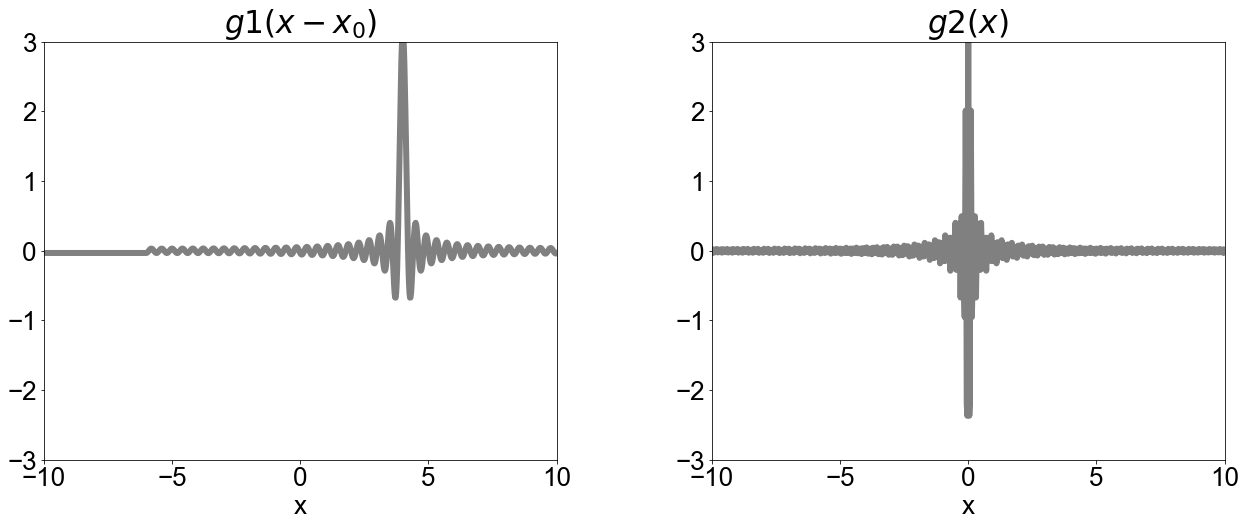

In [103]:
# Now let's pick an example system and check for shift invariance
pickSystem = 'G'
g1 = ExampleSystem(f1,x,pickSystem)

h =  (x==4) # Delta function at x0=4
g1_shifted = signal.convolve(h, g1, mode='same') # Shift by x0, notice implementation as convolution
g1_shifted[(x-x[0])<x0] = g1[0] # Padding to prevent zeros from popping up
g1_shifted[(x-x[N-1])>x0] = g1[N-1] # Padding to prevent zeros from popping up

f1_shifted = signal.convolve(h, f1, mode='same') # Shift by x0, notice implementation as convolution
f1_shifted[(x-x[0])<x0] = f1[0] # Padding to prevent zeros from popping up
f1_shifted[(x-x[N-1])>x0] = f1[N-1] # Padding to prevent zeros from popping up
g2 = ExampleSystem(f1_shifted,x,pickSystem)


# Check whether the two versions are the same
difference = np.linalg.norm(g2 - g1_shifted)
print("Norm of the difference: ||g2(x) - g1(x-x0)|| = ", '{:f}'.format(difference))


# Plot a1*g1+a2*g2 and g3
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(g1_shifted),'gray',linewidth=6.0) # Plot the real part in case it is complex
plt.axis([x[0],x[N-1],-3,3])
plt.xlabel('x')
plt.title('$g1(x-x_0)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,np.real(g2),'gray',linewidth=6.0) # Plot the real part in case it is complex
plt.axis([x[0],x[N-1],-3,3])
plt.title('$g2(x)$')
plt.xlabel('x')
plt.tight_layout(pad=4.0)

# Q3: Example vs counterexample vs proof
In the previous questions, we have examined whether certain systems satisfy the property $g_3(x) = a_1 g_1(x) + a_2 g_2(x)$, or the property $g_2(x) = g_1(x-x_0)$ for some specific examples of $f_1$, $f_2$, $a_1$, $a_2$, $x_0$. 

For those cases where the property (of linearity or shift invariance) holds up for our specific example, can we conclude anything about the overall linearity or shift invariance of the system? 

For those cases where the property (of linearity or shift invariance) does not hold up for our specific example, can we conclude anything about the overall linearity or shift invariance of the system? 


